In [1]:
import os
import sys
import networkx as nx
import numpy as np
import seaborn as sns
from epynet import Network

sys.path.insert(0, os.path.join('..'))
from utils.graph_utils import get_nx_graph, get_sensitivity_matrix

In [2]:
wds_id = 'anytown'

### Loading WDS

In [3]:
path_to_wds = os.path.join('..', 'water_networks', wds_id+'.inp')
wds = Network(path_to_wds)
G = get_nx_graph(wds, mode='binary')

coords = {}
for node in wds.nodes:
    arr = [node.coordinates[0], node.coordinates[1]]
    coords[int(node.index)] = arr

### Sensitivity at base demands

In [4]:
pert = np.max(wds.junctions.basedemand)/100
S = get_sensitivity_matrix(wds, pert)
s = np.sum(np.abs(S), axis=0)
sensitive_nodes = set((np.argsort(s)+1)[:5])

In [5]:
node_arr = np.array(G.nodes)
node_colors = ['#ffffff' for _ in G.nodes]
for node in sensitive_nodes:
    node_colors[np.where(node_arr == node)[0][0]] = '#008000'

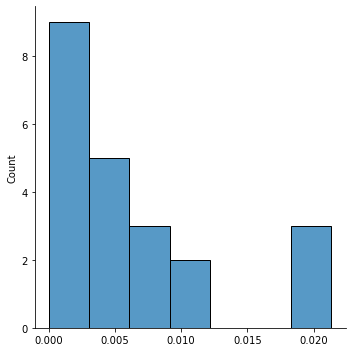

In [6]:
sns.displot(s, bins=7, log_scale=(False, False))

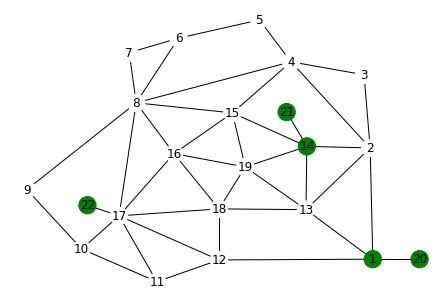

In [7]:
nx.draw(G, pos=coords, with_labels=True, node_color=node_colors, alpha=None)

### Sensitivity at perturbated demands

In [8]:
for pump in wds.pumps:
    pump.speed *= 1.1

for junc in wds.junctions:
    tempo = np.random.rand()
    if tempo < .3:
        junc.basedemand *= 1.1
    elif tempo > .6:
        junc.basedemand *= .9

In [9]:
wds.solve()
S = get_sensitivity_matrix(wds, pert)
s = np.sum(np.abs(S), axis=0)
sensitive_nodes = set((np.argsort(s)+1)[:5])

In [10]:
node_arr = np.array(G.nodes)
node_colors = ['#ffffff' for _ in G.nodes]
for node in sensitive_nodes:
    node_colors[np.where(node_arr == node)[0][0]] = '#008000'

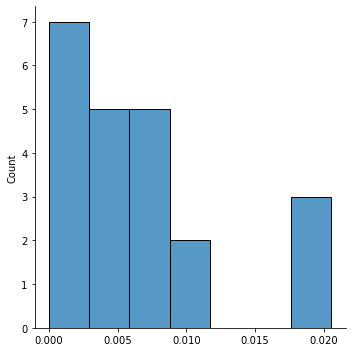

In [11]:
sns.displot(s, bins=7, log_scale=(False, False))

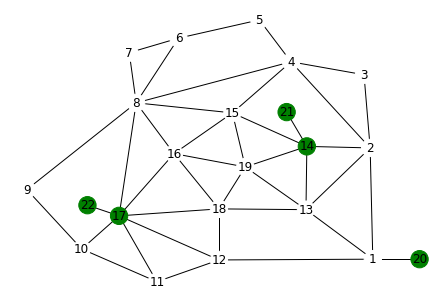

In [12]:
nx.draw(G, pos=coords, with_labels=True, node_color=node_colors, alpha=None)